In [1]:
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
#from tensorflow.keras.applications.vgg16 import VGG16
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
import joblib
from skimage.io import imread
from skimage.transform import resize

gramPositive_labels=['Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Pseudomonas Aeruginosa(+ve)']
gramNegative_labels=['Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)']

all_labels=['Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Pseudomonas Aeruginosa(+ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)']

labels = all_labels

labelsN = []
i=0
for label in labels:
    labelsN.append(int(i))
    i=i+1

def resize_all(src, pklname, include, width=2048, height=1532):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'bacteria images'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
    
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    im = imread(os.path.join(current_path, file))
                    #im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir)
                    data['filename'].append(file)
                    data['data'].append(im)
                    imH = np.fliplr(im)
                    imV = np.flipud(im)
                    #flipH
                    data['label'].append(subdir)
                    data['filename'].append("flipH_" + file)
                    data['data'].append(imH)
                    #flipV
                    data['label'].append(subdir)
                    data['filename'].append("flipV_" + file)
                    data['data'].append(imV)

 
        joblib.dump(data, pklname)

In [3]:
# modify to fit your system
data_path = 'D:/Xendal/University/Grad/Dataset'
os.listdir(data_path)

['Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Pseudomonas Aeruginosa(+ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)']

In [4]:
base_name = 'D:/Xendal/University/Grad/datasetPickle/augmented_bacteria'
width = 2048
height = 1532

gramPositive_include={'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Pseudomonas Aeruginosa(+ve)'}

gramNegative_include={'Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)'}

all_include={'Bifidobacterium spp(-ve)',
 'Candida Albicans(-ve)',
 'Enterococcus faecalis(-ve)',
 'Escherichia Coli(+ve)',
 'Fusobacterium(+ve)',
 'Lactobacillus Gasseri(-ve)',
 'Listeria Monocytogenes(-ve)',
 'Pseudomonas Aeruginosa(+ve)',
 'Staphylococcus Epidermidis(-ve)',
 'Streptococcus Agalactiae(-ve)'}

include = all_include
   
#resize_all(src=data_path, pklname=base_name, width=width, include=include,)

In [5]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{height}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  624
keys:  ['description', 'label', 'filename', 'data']
description:  bacteria images
image shape:  (1532, 2048, 3)
labels: ['Bifidobacterium spp(-ve)' 'Candida Albicans(-ve)'
 'Enterococcus faecalis(-ve)' 'Escherichia Coli(+ve)' 'Fusobacterium(+ve)'
 'Lactobacillus Gasseri(-ve)' 'Listeria Monocytogenes(-ve)'
 'Pseudomonas Aeruginosa(+ve)' 'Staphylococcus Epidermidis(-ve)'
 'Streptococcus Agalactiae(-ve)']


Counter({'Bifidobacterium spp(-ve)': 69,
         'Candida Albicans(-ve)': 60,
         'Enterococcus faecalis(-ve)': 60,
         'Escherichia Coli(+ve)': 60,
         'Fusobacterium(+ve)': 69,
         'Lactobacillus Gasseri(-ve)': 60,
         'Listeria Monocytogenes(-ve)': 66,
         'Pseudomonas Aeruginosa(+ve)': 60,
         'Staphylococcus Epidermidis(-ve)': 60,
         'Streptococcus Agalactiae(-ve)': 60})

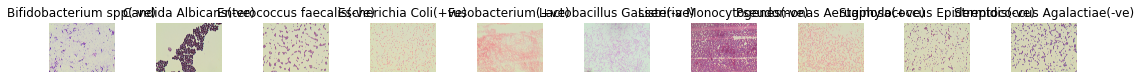

In [6]:
# use np.unique to get all unique values in the list of labels
labels = np.unique(data['label'])
 
# set up the matplotlib figure and axes, based on the number of labels
fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
# make a plot for every label (equipment) type. The index method returns the 
# index of the first item corresponding to its search string, label in this case
for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [7]:
X = np.array(data['data'])
y = np.array(data['label'])

In [8]:
le = preprocessing.LabelEncoder()
le.fit(y)
y_labels_encoded = le.transform(y)

In [9]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y_labels_encoded, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

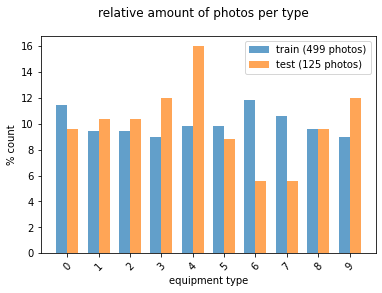

In [10]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
    
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [12]:
class ResizeTransformer(BaseEstimator, TransformerMixin):
    """
    Scales array to 1/3
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        """perform the transformation and return an array"""
        return np.array([resize(img, (img.shape[0] // 6.8, img.shape[1] // 6.8), anti_aliasing='True') for img in X])

In [13]:
class NormalizeTransformer(BaseEstimator, TransformerMixin):
    """
    turns array to 8-bit
    """
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        """returns itself"""
        return self
 
    def transform(self, X, y=None):
        return np.array([cv.normalize(img, None, 0, 255, cv.NORM_MINMAX).astype('uint8') for img in X])

In [14]:
class HogTransformer(BaseEstimator, TransformerMixin):
    """
    Expects an array of 2d arrays (1 channel images)
    Calculates hog features for each img
    """

    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)

        try: # parallel
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [15]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
import cv2 as cv
from skimage.transform import rescale

resizify = ResizeTransformer()

X_train_resize=resizify.fit_transform(X_train)

print(X_train.shape)
print(X_train_resize.shape)

(499, 1532, 2048, 3)
(499, 225, 301, 3)


In [16]:
normalize = NormalizeTransformer()
X_train_normalize=normalize.fit_transform(X_train_resize)

print(X_train_normalize.shape)

(499, 225, 301, 3)


In [17]:
X_train_sift=np.zeros((X_train_normalize.shape[0],115,128))
sift = cv.xfeatures2d.SIFT_create()

minFeat=99999999

for i in range(int(X_train_normalize.shape[0])):
    keypoints_sift, descriptors = sift.detectAndCompute(X_train_normalize[i], None)
    if descriptors.shape[0]<=1000:
        minFeat=np.minimum(minFeat, descriptors.shape[0])
        print(str(i) + "shape: " + str(descriptors.shape))
    descriptors=descriptors[np.median(descriptors,axis=1).argsort()]
    X_train_sift[i]=descriptors[:115]

print(X_train_normalize.shape)
print(X_train_sift.shape)
print(minFeat)

2shape: (964, 128)
3shape: (727, 128)
9shape: (999, 128)
12shape: (278, 128)
13shape: (826, 128)
15shape: (908, 128)
18shape: (923, 128)
19shape: (425, 128)
20shape: (895, 128)
21shape: (799, 128)
23shape: (695, 128)
24shape: (917, 128)
25shape: (993, 128)
27shape: (917, 128)
28shape: (741, 128)
29shape: (788, 128)
32shape: (167, 128)
33shape: (865, 128)
36shape: (542, 128)
39shape: (989, 128)
40shape: (960, 128)
41shape: (804, 128)
43shape: (762, 128)
46shape: (478, 128)
47shape: (794, 128)
48shape: (820, 128)
49shape: (743, 128)
53shape: (842, 128)
54shape: (673, 128)
55shape: (312, 128)
56shape: (494, 128)
57shape: (991, 128)
58shape: (726, 128)
60shape: (882, 128)
61shape: (733, 128)
63shape: (969, 128)
65shape: (828, 128)
66shape: (534, 128)
69shape: (890, 128)
70shape: (424, 128)
81shape: (917, 128)
82shape: (847, 128)
84shape: (827, 128)
88shape: (171, 128)
93shape: (559, 128)
95shape: (889, 128)
96shape: (843, 128)
100shape: (933, 128)
101shape: (116, 128)
104shape: (815, 128)


In [18]:
X_test_resize=resizify.fit_transform(X_test)
X_test_normalize=normalize.fit_transform(X_test_resize)

X_test_sift=np.zeros((X_test_normalize.shape[0],115,128))
sift = cv.xfeatures2d.SIFT_create()

minFeat=99999999

for i in range(int(X_test_normalize.shape[0])):
    keypoints_sift, descriptors = sift.detectAndCompute(X_test_normalize[i], None)
    if descriptors.shape[0]<=1000:
        minFeat=np.minimum(minFeat, descriptors.shape[0])
        print(str(i) + "shape: " + str(descriptors.shape))
    descriptors=descriptors[np.median(descriptors,axis=1).argsort()]
    X_test_sift[i]=descriptors[:115]

print(X_test.shape)
print(X_test_normalize.shape)
print(X_test_sift.shape)
print(minFeat)

2shape: (538, 128)
3shape: (679, 128)
6shape: (881, 128)
7shape: (976, 128)
10shape: (576, 128)
11shape: (838, 128)
13shape: (731, 128)
15shape: (991, 128)
16shape: (430, 128)
20shape: (838, 128)
21shape: (674, 128)
23shape: (729, 128)
26shape: (329, 128)
28shape: (733, 128)
29shape: (319, 128)
31shape: (751, 128)
32shape: (131, 128)
34shape: (855, 128)
38shape: (931, 128)
42shape: (790, 128)
45shape: (761, 128)
46shape: (634, 128)
48shape: (791, 128)
49shape: (684, 128)
50shape: (769, 128)
51shape: (901, 128)
52shape: (799, 128)
53shape: (622, 128)
55shape: (757, 128)
57shape: (790, 128)
58shape: (684, 128)
59shape: (833, 128)
62shape: (625, 128)
65shape: (324, 128)
67shape: (835, 128)
69shape: (503, 128)
70shape: (482, 128)
73shape: (781, 128)
74shape: (431, 128)
77shape: (760, 128)
82shape: (574, 128)
84shape: (763, 128)
88shape: (934, 128)
90shape: (690, 128)
91shape: (778, 128)
93shape: (789, 128)
94shape: (637, 128)
95shape: (893, 128)
99shape: (474, 128)
100shape: (467, 128)
104

In [19]:
from tensorflow.keras import datasets, layers, models

ann = models.Sequential([
        layers.Flatten(input_shape=(X_train_sift.shape[1], X_train_sift.shape[2])),
        layers.Dense(500, activation='relu'),
        layers.Dense(50, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

In [20]:
from tensorflow.keras.optimizers import SGD,Adam
opt = Adam(lr=0.0001)
ann.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = ann.fit(X_train_sift, y_train, epochs=100, steps_per_epoch=len(X_train_sift)/32, validation_data=(X_test_sift, y_test), batch_size=32)

Train on 499 samples, validate on 125 samples
Epoch 1/100
499/499 [==============================] - 1s 2ms/sample - loss: 31.2229 - accuracy: 0.1884 - val_loss: 3.9807 - val_accuracy: 0.2000
Epoch 2/100
499/499 [==============================] - 1s 1ms/sample - loss: 2.5362 - accuracy: 0.1583 - val_loss: 2.2022 - val_accuracy: 0.1920
Epoch 3/100
499/499 [==============================] - 0s 974us/sample - loss: 2.0944 - accuracy: 0.2184 - val_loss: 2.2757 - val_accuracy: 0.2480
Epoch 4/100
499/499 [==============================] - 0s 979us/sample - loss: 2.0412 - accuracy: 0.2285 - val_loss: 2.0067 - val_accuracy: 0.1760
Epoch 5/100
499/499 [==============================] - 0s 975us/sample - loss: 1.9805 - accuracy: 0.2385 - val_loss: 2.0562 - val_accuracy: 0.3440
Epoch 6/100
499/499 [==============================] - 0s 965us/sample - loss: 1.8817 - accuracy: 0.2886 - val_loss: 2.2082 - val_accuracy: 0.3040
Epoch 7/100
499/499 [==============================] - 0s 941us/sample - lo

In [21]:
ann.evaluate(X_test_sift,y_test)

125/125 [==============================] - 0s 271us/sample - loss: 3.2761 - accuracy: 0.6160


[3.27607949256897, 0.616]

In [22]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test_sift)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.68      1.00      0.81        13
           2       0.44      0.85      0.58        13
           3       0.71      0.80      0.75        15
           4       1.00      0.75      0.86        20
           5       0.56      0.82      0.67        11
           6       0.67      0.29      0.40         7
           7       0.43      0.43      0.43         7
           8       0.29      0.17      0.21        12
           9       0.00      0.00      0.00        15

    accuracy                           0.62       125
   macro avg       0.54      0.59      0.54       125
weighted avg       0.56      0.62      0.57       125



c:\Users\omar_\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\omar_\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\omar_\anaconda3\envs\deeplearning\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
#y_pred = ann.predict(X_test_feats)
#y_pred = le.inverse_transform(y_pred)
#y_test = le.inverse_transform(y_test)
print('Percentage correct: ', 100*np.sum(y_pred_classes == y_test)/len(y_test))

Percentage correct:  61.6


In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd

cmx=confusion_matrix(y_test, y_pred_classes, labels=labelsN)

df2 = pd.DataFrame(cmx, columns=labels, index=labels)
df2.columns.name = 'prediction'
df2.index.name = 'label'
df2

prediction,Bifidobacterium spp(-ve),Candida Albicans(-ve),Enterococcus faecalis(-ve),Escherichia Coli(+ve),Fusobacterium(+ve),Lactobacillus Gasseri(-ve),Listeria Monocytogenes(-ve),Pseudomonas Aeruginosa(+ve),Staphylococcus Epidermidis(-ve),Streptococcus Agalactiae(-ve)
label,,,,,,,,,,
Bifidobacterium spp(-ve),10,0,0,0,0,2,0,0,0,0
Candida Albicans(-ve),0,13,0,0,0,0,0,0,0,0
Enterococcus faecalis(-ve),0,1,11,1,0,0,0,0,0,0
Escherichia Coli(+ve),0,0,0,12,0,1,0,0,2,0
Fusobacterium(+ve),0,0,0,0,15,1,0,3,1,0
Lactobacillus Gasseri(-ve),2,0,0,0,0,9,0,0,0,0
Listeria Monocytogenes(-ve),0,4,0,0,0,0,2,0,1,0
Pseudomonas Aeruginosa(+ve),1,0,0,0,0,3,0,3,0,0
Staphylococcus Epidermidis(-ve),2,0,4,3,0,0,0,1,2,0


In [25]:
tp=0
fn=0
tn=0
fp=0

for i in range(len(labels)):
    for k in range(len(labels)):
        if k == i:
            tp+=cmx[i][k]
            if cmx[i][i]==0:
                fn+=1
        else:
            if cmx[i][k]!=0:
                fp+=cmx[i][k]
            else:
                tn+=1


print('TP:', tp)
print('FP:', fp)
print('TN:', tn)
print('FN:', fn)

prec=(tp/(tp+fp))*100
recall=((tp)/(tp+fn))*100
acc=((tp+tn)/(tp+fp+tn+fn))*100
spec=((tn)/(tn+fp))*100
print('Precision:' + str(prec) +
     '\nRecall:' + str(recall) +
      '\nAccuracy:' + str(acc) +
      '\nSpecificity:' + str(spec))

TP: 77
FP: 48
TN: 67
FN: 1
Precision:61.6
Recall:98.71794871794873
Accuracy:74.61139896373057
Specificity:58.26086956521739


The prediction for this image is:  ['Lactobacillus Gasseri(-ve)']
The actual label for this image is:  ['Fusobacterium(+ve)']


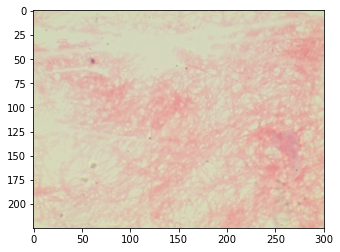

In [26]:
n=np.random.randint(0, X_test.shape[0])
img = X_test_resize[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_normalized=normalize.fit_transform(input_img)

input_img_features=np.zeros((X_test_normalize.shape[0],115,128))
sift = cv.xfeatures2d.SIFT_create()

for i in range(int(X_test_normalize.shape[0])):
    keypoints_sift, descriptors = sift.detectAndCompute(X_test_normalize[i], None)
    descriptors=descriptors[np.median(descriptors,axis=1).argsort()]
    input_img_features[i]=descriptors[:115]

y_pred_rand = ann.predict(input_img_features)[0]

y_pred_rand_class = np.argmax(y_pred_rand)
y_pred_rand_class=le.inverse_transform([y_pred_rand_class])
y_actual = le.inverse_transform([y_test[n]])

print("The prediction for this image is: ", y_pred_rand_class)
print("The actual label for this image is: ", y_actual)